In [ ]:
#@title Texto de título padrão

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = load_boston()

In [ ]:
X, y = dataset.data, dataset.target

In [ ]:
df = pd.DataFrame(
    data=X, 
    columns=dataset.feature_names
)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

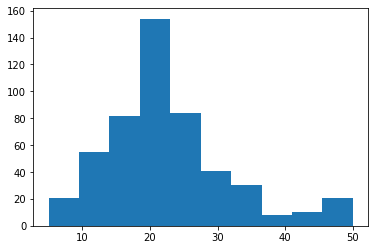

In [ ]:
plt.hist(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42
)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

y_pred

array([25.1       , 30.06666667, 13.46666667, 30.76666667, 18.26666667,
       30.63333333, 19.13333333, 15.96666667, 19.86666667, 22.4       ,
       25.2       , 17.66666667, 11.96666667, 22.93333333, 23.8       ,
       22.13333333, 19.73333333, 12.63333333, 36.4       , 11.1       ,
       27.83333333, 29.53333333, 16.73333333, 20.3       , 21.56666667,
       27.33333333, 22.93333333,  9.76666667, 24.56666667, 22.66666667,
       21.7       , 24.56666667,  8.56666667, 29.83333333, 21.56666667,
       19.33333333, 22.73333333, 25.8       , 21.9       , 30.76666667,
       22.66666667, 27.5       , 43.76666667, 21.26666667, 24.03333333,
       12.56666667, 21.16666667, 30.76666667, 20.73333333, 22.06666667,
       20.43333333, 30.76666667, 19.9       , 22.66666667, 35.36666667,
       20.83333333, 10.83333333, 33.36666667, 23.33333333, 22.63333333,
       23.5       , 36.4       , 30.76666667, 14.8       , 28.46666667,
       25.2       , 11.8       , 24.73333333, 33.36666667, 13.33

In [ ]:
mean_absolute_error(y_test, y_pred)

3.998686371100164

(array([ 3., 12., 39., 63., 56., 13., 11.,  4.,  1.,  1.]),
 array([-15.3       , -11.53666667,  -7.77333333,  -4.01      ,
         -0.24666667,   3.51666667,   7.28      ,  11.04333333,
         14.80666667,  18.57      ,  22.33333333]),
 <BarContainer object of 10 artists>)

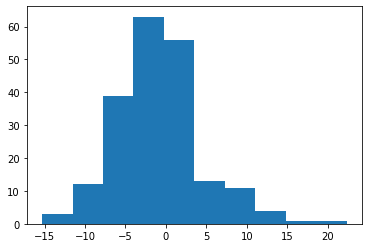

In [ ]:
diff = y_test - y_pred

plt.hist(diff)

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test_scaled)

mean_absolute_error(y_test, y_pred)

2.9213464696223315

(array([ 2.,  9., 82., 75., 23., 10.,  1.,  0.,  0.,  1.]),
 array([-13.13333333,  -8.92333333,  -4.71333333,  -0.50333333,
          3.70666667,   7.91666667,  12.12666667,  16.33666667,
         20.54666667,  24.75666667,  28.96666667]),
 <BarContainer object of 10 artists>)

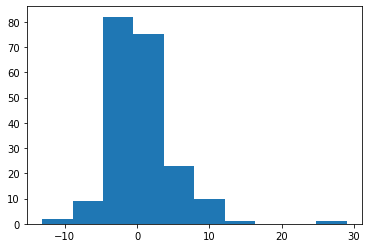

In [ ]:
diff = y_test - y_pred

plt.hist(diff)